# How Princeton Housing Screwed Up (Massively)

Original source (run this yourself!): https://princetonhousing.github.io/housing_screwed_up.ipynb. Please credit us if you do anything with the code. Original draw lists are not available online publicly, but email us from a Princeton email and we'll share the lists. You can also download them from My Housing, at least until Housing takes them down.

Contact: Adam Chang '20 (adam.chang @) and Yang Song '20 (yangsong @)

## TLDR: Housing screwed up, a lot more than they've admitted. It affects everyone.

On April 25, 2019, Princeton's Director of Housing, Dorian Johnson, sent a vague email to undergradutes with subject "Room Draw Randomization Concern," in which he wrote that "students who are in the same upper-class room draw group this year as last year are more likely than expected to have drawn times in the same order as they did last year."

Dorian Johnson also wrote that "[t]he roughly 220 students directly affected are all rising seniors."

Email from Housing: https://princetonhousing.github.io/housing_email.pdf

Story in campus news: http://www.dailyprincetonian.com/article/2019/04/u-claims-error-in-room-draw-process-provides-compensation-to-affected-students, http://www.dailyprincetonian.com/article/2019/04/students-react-to-room-draw-error

### That's not the whole story, or the truth.

##### Below, you'll see that there are many further issues Housing still hasn't disclosed, and may intentionally be seeking to hide (*). These include:

### 1) Larger groups, earlier draw times (by far).

The larger a group is, the better a draw time it receives, on average. We show a possible explanation as well. Year after year, Housing has said that draw group size doesn't matter ("points" in groups are only an average); see https://hres.princeton.edu/undergraduates/my-housing/apply-draw. Housing lied.

The implications of this: those more likely to be in smaller groups/by themselves get much worse rooms. If you believe that  more vulnerable students (special needs/mental health issues/social anxiety/etc.) are more likely to be in smaller groups/by themselves, this means that room draw discriminates against these populations, and in doing so makes their situations even more difficult (worse rooms, farther from services on campus, etc.).

__This could be a violation of the Fair Housing Act.__

[JUMP TO GRAPHS](#Big-groups-get-earlier-draw-times---by-a-lot)

### 2) What caused the first problem? Housing probably made a middle school mistake.

[JUMP TO SIMULATIONS](#Housing-made-a-middle-school-mistake)


### 3) When Dorian says groups were "more likely than expected to have drawn times in the same order," what he really means is "we kept the order exactly the same."

Own up to the problem, Dorian.

[JUMP TO GRAPH](#Hundreds-of-groups-stayed-in-exactly-the-same-position-from-2018-to-2019)


### 4) The randomization failure Housing admitted to also affects rising juniors. Their group orders from their Res College draws have largely remained the same.

A lot more people should receive $1000.

[JUMP TO GRAPH](#Rising-juniors-were-affected-also)

### 5) Upperclass and Independent draw are in the same order each year.

This is also true for Res College/Upperclass draws, and so on, in the same year. This may or may not be intentional, but it's not necessarily unfair. It just makes the distribution of rooms a lot more unequal (so those worst off get shafted on all counts).

[JUMP TO GRAPH](#Upperclass-and-independent-draw-are-in-the-same-order)

### 6) (BONUS) Room draw lists are (were?) available publicly on Housing's website (no login required). That means that anyone on the internet knows: students' PUIDs, first name and last name, their friends, and so on. This seems illegal.

Story in campus news: http://www.dailyprincetonian.com/article/2019/04/draw-docs-not-protected-by-cas

## UPDATES

### 7) The trend of smaller groups getting worse draw times applies to __all draws__ in 2018-2019 and 2019-2020, including Res College draws.

[JUMP TO GRAPHS](#This-is-true-across-all-draws-in-2018-2019-and-2019-2020,-including-Underclass-draws)

### 8) What can you do?

Several students have started a petition for Housing reform (text linked in form): https://forms.gle/RboV2z68Rszw5kpv9.

But there's very little accountability in this situation, especially with how little Housing cares about responding to students (all concerns on this page were raised by students to Housing months and years ago, to no avail).

Thankfully, there exists one person that's accountable to students yet may actually influence Housing. That's your DSL/Director of Student Life: reach out, explain your personal situation, show them proof that room draw was unfair (e.g., link to this page), and ask how they'll work to address this. __Your short note/phone call to your DSL will make a difference.__

- Butler: Joe Rolon (609-258-1664, jrolon@princeton.edu)
- Forbes: Olivia Weiner (609-258-4825, oweiner@princeton.edu)
- Mathey: Darleny Cepin (609-258-8845, dcepin@princeton.edu)
- Rocky: Amy Ham Johnson (609-258-2652, amyham@princeton.edu)
- Whitman: Momo Wolapaye (609-258-8145, momo@princeton.edu)
- Wilson: Garrett Meggs (609-258-3281, gmeggs@princeton.edu)

(*) Housing has modified lists previously available on the My Housing website. Notably, the Upperclass list no longer includes "Group ID" or independent students, making the randomization failures less obvious.

### Boring stuff to get the data in

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
upperclass19 = pd.read_csv("lists/UpperclassDrawTimesTimeOrder19.csv")
upperclass18 = pd.read_csv("lists/UpperclassDrawTimesTimeOrder18.csv")
indep19 = pd.read_csv("lists/IndependentDrawTimesTimeOrder19.csv")

In [4]:
# We order groups.
upper19_groups_ordered = upperclass19["Group"].unique()
upper18_groups_ordered = upperclass18["Group ID"].unique()
indep19_groups_ordered = indep19["Group"].unique()

# The score is the percentile rank (between 0-1) of all draw groups. Lower is better.
upperclass19["Score"] = upperclass19["Group"].apply(lambda x: np.where(upper19_groups_ordered == x)[0][0]) + 1
upperclass19["Score"] = upperclass19["Score"] / len(upper19_groups_ordered)

upperclass18["Score"] = upperclass18["Group ID"].apply(lambda x: np.where(upper18_groups_ordered == x)[0][0]) + 1
upperclass18["Score"] = upperclass18["Score"] / len(upper18_groups_ordered)

indep19["Score"] = indep19["Group"].apply(lambda x: np.where(indep19_groups_ordered == x)[0][0]) + 1
indep19["Score"] = indep19["Score"] / len(indep19_groups_ordered)

### Create more data tables with groups and their statistics (number of seniors/juniors, etc.)

In [5]:
u19_groups = pd.DataFrame(upper19_groups_ordered, columns = ["Group"])
u18_groups = pd.DataFrame(upper18_groups_ordered, columns = ["Group"])
i19_groups = pd.DataFrame(indep19_groups_ordered, columns = ["Group"])

# Calculate number of students and each group, and get their score.
u19_groups["n_Students"] = u19_groups["Group"].apply(lambda x: np.sum(upperclass19["Group"] == x))
u19_groups["Score"] = u19_groups.index / len(u19_groups)

u18_groups["n_Students"] = u18_groups["Group"].apply(lambda x: np.sum(upperclass18["Group ID"] == x))
u18_groups["Score"] = u18_groups.index / len(u18_groups)

i19_groups["n_Students"] = i19_groups["Group"].apply(lambda x: np.sum(indep19["Group"] == x))
i19_groups["Score"] = i19_groups.index / len(u18_groups)

# Calculate number of seniors and juniors.
u19_groups["n_Seniors"] = u19_groups["Group"].apply(lambda x: np.sum(upperclass19[upperclass19["Class Yr"] == 2020]["Group"] == x))
u19_groups["n_Juniors"] = u19_groups["Group"].apply(lambda x: np.sum(upperclass19[upperclass19["Class Yr"] == 2021]["Group"] == x))

u18_groups["n_Seniors"] = u18_groups["Group"].apply(lambda x: np.sum(upperclass18[upperclass18["Class Yr"] == 2019]["Group ID"] == x))
u18_groups["n_Juniors"] = u18_groups["Group"].apply(lambda x: np.sum(upperclass18[upperclass18["Class Yr"] == 2020]["Group ID"] == x))

i19_groups["n_Seniors"] = i19_groups["Group"].apply(lambda x: np.sum(indep19[indep19["Class Yr"] == 2020]["Group"] == x))
i19_groups["n_Juniors"] = i19_groups["Group"].apply(lambda x: np.sum(indep19[indep19["Class Yr"] == 2021]["Group"] == x))

In [6]:
u19_groups_seniorsonly = u19_groups[u19_groups["n_Juniors"] == 0]
u18_groups_seniorsonly = u18_groups[u18_groups["n_Juniors"] == 0]
i19_groups_seniorsonly = i19_groups[i19_groups["n_Juniors"] == 0]

u19_groups_juniorsonly = u19_groups[u19_groups["n_Seniors"] == 0]
u18_groups_juniorsonly = u18_groups[u18_groups["n_Seniors"] == 0]
i19_groups_juniorsonly = i19_groups[i19_groups["n_Seniors"] == 0]

# Hundreds of groups stayed in exactly the same position from 2018 to 2019

The graph below is of students who drew in the Upperclass draw in both 2018-2019 and 2019-2020. Lower scores are higher on the draw list. The straight line in the bottom-right of the corner reflects the hundreds of groups whose draw times stayed exactly the same (if group A came before group B last year, they did so again this year).

If draw were random, the entire graph would have no pattern at all.

In [7]:
# Merge Upperclass draws from 2018-2019 and 2019-2020 based on students in both groups
upper_18_19 = upperclass18.merge(upperclass19, on='PUID', how='inner')

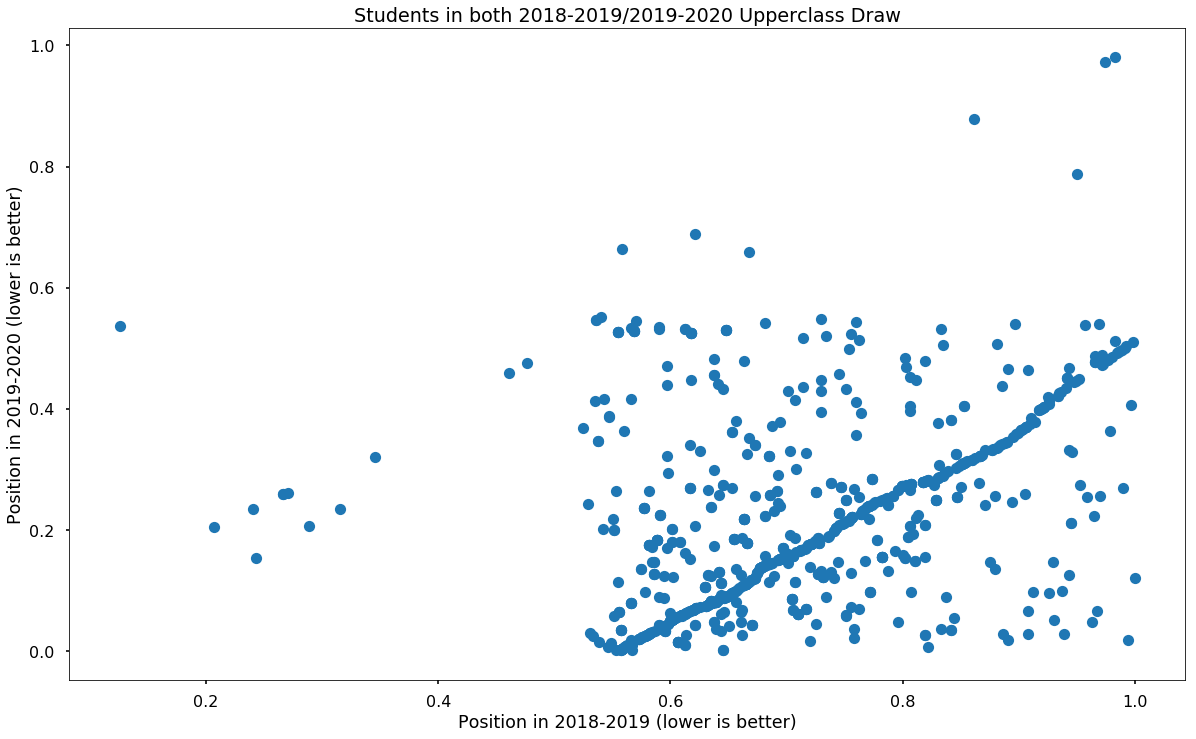

In [8]:
plt.figure(figsize = (20, 12))
plt.style.use('seaborn-poster')
plt.plot(upper_18_19["Score_x"], upper_18_19["Score_y"], 'o')
plt.title("Students in both 2018-2019/2019-2020 Upperclass Draw")
plt.xlabel("Position in 2018-2019 (lower is better)")
plt.ylabel("Position in 2019-2020 (lower is better)")
plt.show()

On all graphs, position is the position of a student's GROUP amongst all GROUPS in that draw. So, for example, most seniors should have a position in between 0-0.5 (since they come before all juniors).

# Rising juniors were affected also

Let's take a look at students who drew in Forbes in 2018-2019 and in Upperclass in 2019-2020.

The trend is less obvious, since there are fewer students (and even fewer who stay in the same draw groups), but there still seems to be some trend on the diagonal, meaning earlier draw times in Forbes last year = earlier draw times in Upperclass this year.

In [9]:
forbes18 = pd.read_csv("lists/ForbesDrawTimesTimeOrder18.csv")
forbes18_groups_ordered = forbes18["Group ID"].unique()

forbes18["Score"] = forbes18["Group ID"].apply(lambda x: np.where(forbes18_groups_ordered == x)[0][0]) + 1
forbes18["Score"] = forbes18["Score"] / len(forbes18_groups_ordered)

In [10]:
# Merge Forbes and Upperclass draws from 2018-2019 and 2019-2020 based on students in both groups
forbes_18_upper_19 = upperclass19.merge(forbes18, on='PUID', how='inner')

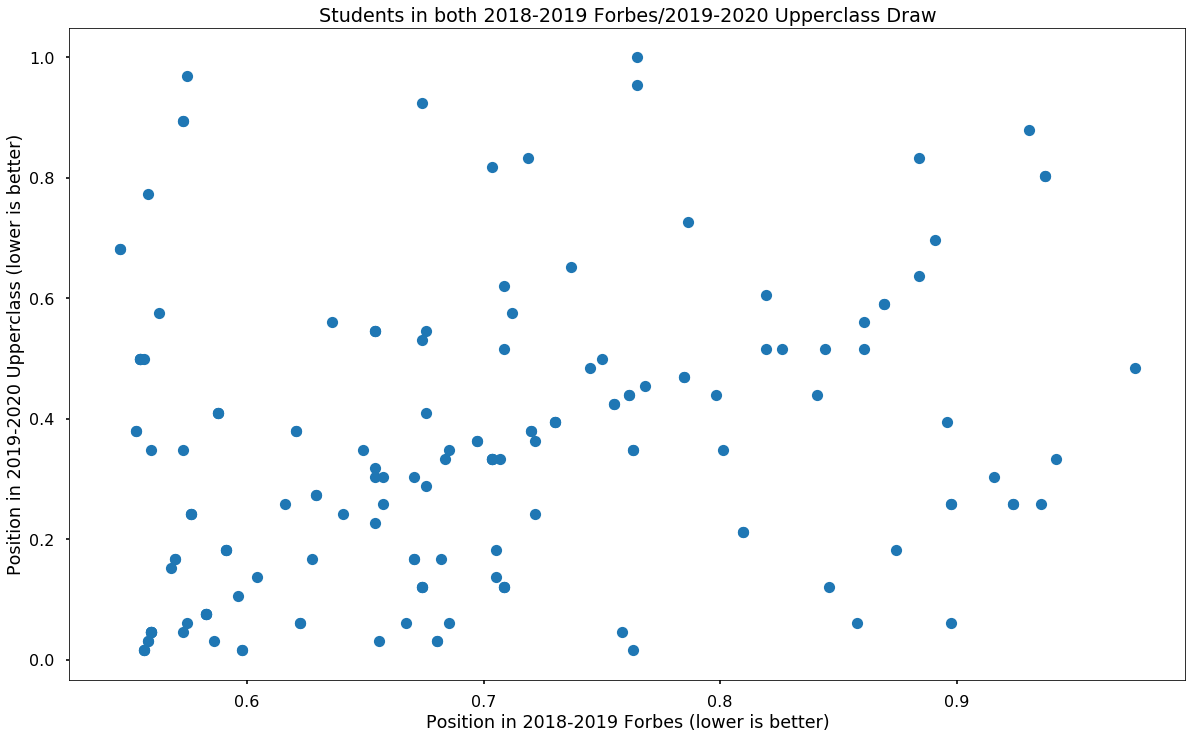

In [11]:
plt.figure(figsize = (20, 12))
plt.style.use('seaborn-poster')
plt.plot(forbes_18_upper_19["Score_x"], forbes_18_upper_19["Score_y"], 'o')
plt.title("Students in both 2018-2019 Forbes/2019-2020 Upperclass Draw")
plt.xlabel("Position in 2018-2019 Forbes (lower is better)")
plt.ylabel("Position in 2019-2020 Upperclass (lower is better)")
plt.show()

On all graphs, position is the position of a student's GROUP amongst all GROUPS in that draw. So, for example, most seniors should have a position in between 0-0.5 (since they come before all juniors).

# Upperclass and independent draw are in the same order

The graph below is of students who drew in both the Upperclass draw and Independent draw for 2019-2020. Lower scores are higher on the draw list. The straight line reflects the hundreds of groups whose draw times stayed in exactly the same order (if group A came before group B in Upperclass draw, they did so again in Independent).

If draw were random, the entire graph would have no pattern at all.

In [12]:
# Merge Upperclass draws from 2018-2019 and 2019-2020 based on students in both groups
upper_indep_19 = upperclass19.merge(indep19, on='PUID', how='inner')

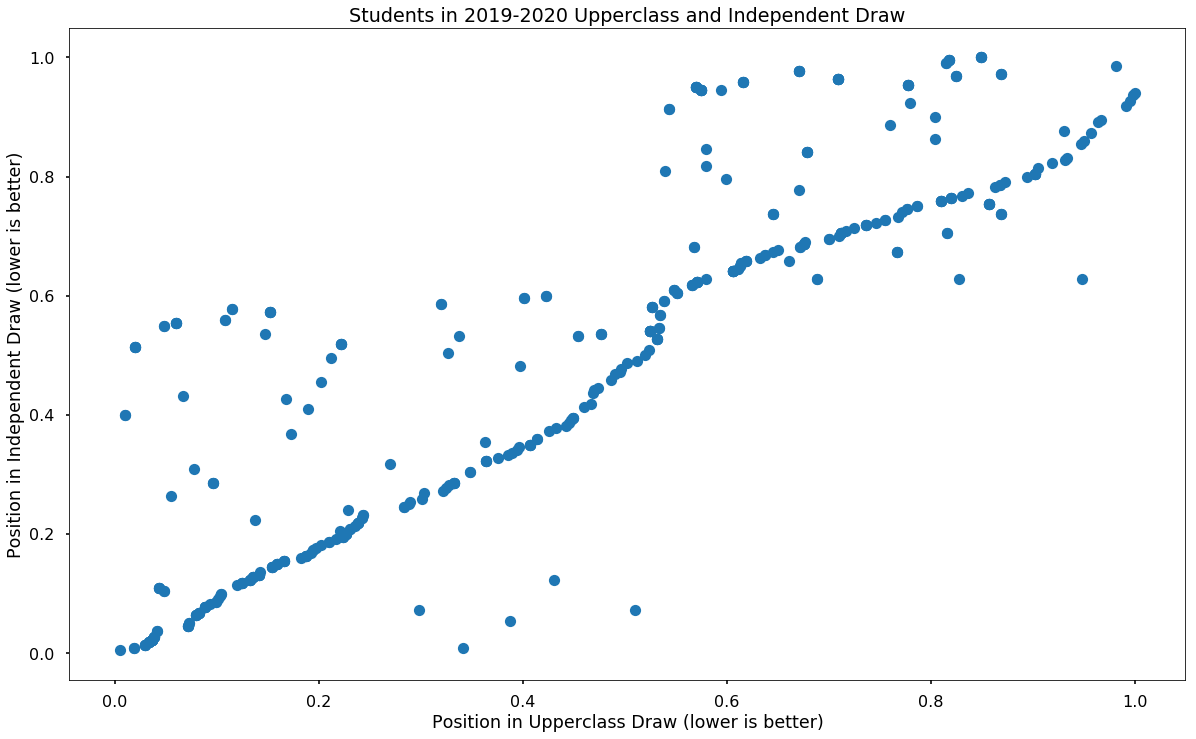

In [13]:
plt.figure(figsize = (20, 12))
plt.style.use('seaborn-poster')
plt.plot(upper_indep_19["Score_x"], upper_indep_19["Score_y"], 'o')
plt.title("Students in 2019-2020 Upperclass and Independent Draw")
plt.xlabel("Position in Upperclass Draw (lower is better)")
plt.ylabel("Position in Independent Draw (lower is better)")
plt.show()

On all graphs, position is the position of a student's GROUP amongst all GROUPS in that draw. So, for example, most seniors should have a position in between 0-0.5 (since they come before all juniors).

# Big groups get earlier draw times - by a lot

If draw were fair, they should be close to a horizontal line (group size shouldn't influence your draw time). Clearly, there are strong trends in each of the graphs.

__One way to check if this might have happened by chance alone is by fitting a linear regression on average draw position by group size. We get around a 0.17% chance that this was just "unlucky," so it almost certainly wasn't, especially in four different scenarios.__

In [14]:
u19_sen_group_avg = []
u19_sen_group_std = []

for i in range(1,9):
    u19_sen_group_avg.append(np.mean(u19_groups_seniorsonly[u19_groups_seniorsonly["n_Students"] == i]["Score"]))
    u19_sen_group_std.append(np.std(u19_groups_seniorsonly[u19_groups_seniorsonly["n_Students"] == i]["Score"]))

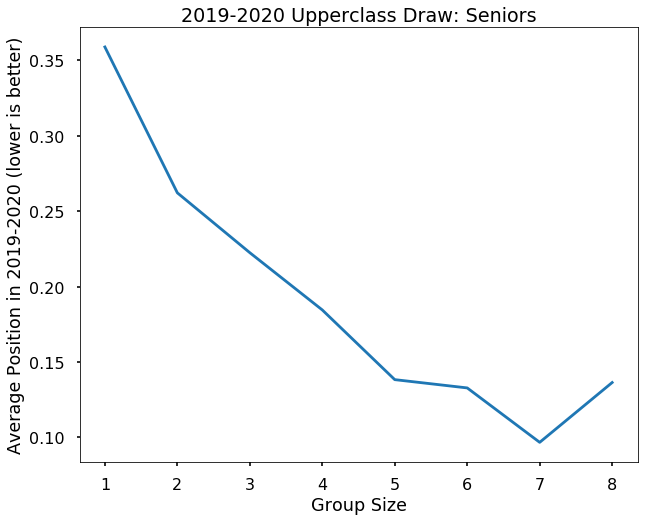

In [15]:
plt.figure(figsize = (10, 8))
plt.style.use('seaborn-poster')
plt.plot(range(1,9), u19_sen_group_avg)
plt.title("2019-2020 Upperclass Draw: Seniors")
plt.xlabel("Group Size")
plt.ylabel("Average Position in 2019-2020 (lower is better)")
plt.show()

On all graphs, position is the position of a student's GROUP amongst all GROUPS in that draw. So, for example, most seniors should have a position in between 0-0.5 (since they come before all juniors).

In [16]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(range(1,9), u19_sen_group_avg)
print("Slope: %s" % slope)
print("p-value: %s" % p_value)

Slope: -0.032116759565824576
p-value: 0.0016620909919678928


In [17]:
u19_jun_group_avg = []
u19_jun_group_std = []

for i in range(1,9):
    u19_jun_group_avg.append(np.mean(u19_groups_juniorsonly[u19_groups_juniorsonly["n_Students"] == i]["Score"]))
    u19_jun_group_std.append(np.std(u19_groups_juniorsonly[u19_groups_juniorsonly["n_Students"] == i]["Score"]))

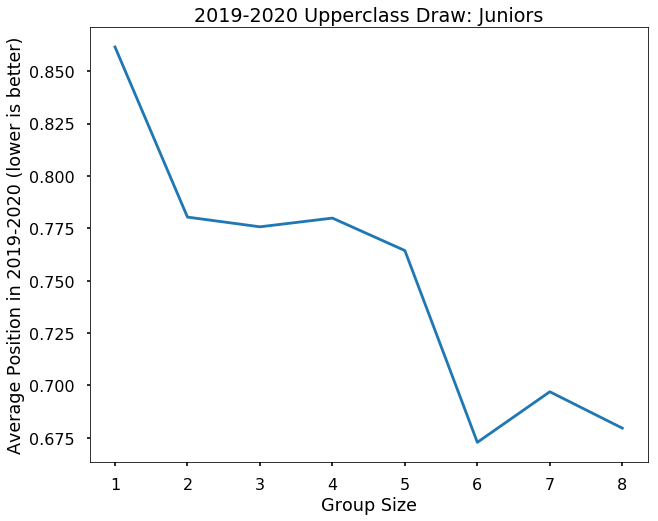

In [18]:
plt.figure(figsize = (10, 8))
plt.style.use('seaborn-poster')
plt.plot(range(1,9), u19_jun_group_avg)
plt.title("2019-2020 Upperclass Draw: Juniors")
plt.xlabel("Group Size")
plt.ylabel("Average Position in 2019-2020 (lower is better)")
plt.show()

In [19]:
u18_sen_group_avg = []
u18_sen_group_std = []

for i in range(1,9):
    u18_sen_group_avg.append(np.mean(u18_groups_seniorsonly[u18_groups_seniorsonly["n_Students"] == i]["Score"]))
    u18_sen_group_std.append(np.std(u18_groups_seniorsonly[u18_groups_seniorsonly["n_Students"] == i]["Score"]))

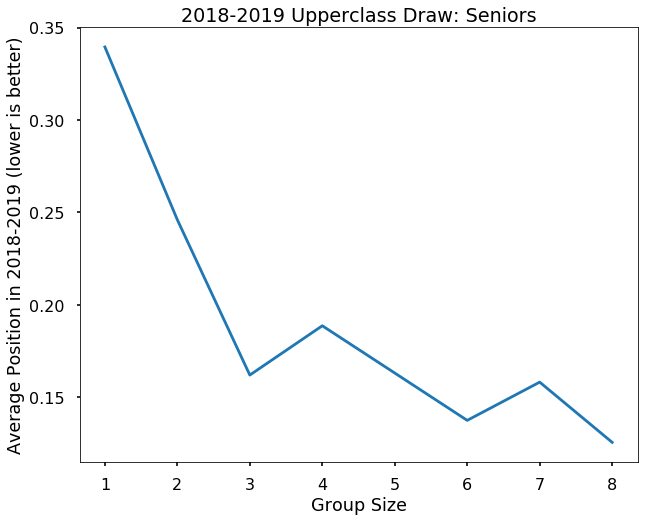

In [20]:
plt.figure(figsize = (10, 8))
plt.style.use('seaborn-poster')
plt.plot(range(1,9), u18_sen_group_avg)
plt.title("2018-2019 Upperclass Draw: Seniors")
plt.xlabel("Group Size")
plt.ylabel("Average Position in 2018-2019 (lower is better)")
plt.show()

In [21]:
u18_jun_group_avg = []
u18_jun_group_std = []

for i in range(1,9):
    u18_jun_group_avg.append(np.mean(u18_groups_juniorsonly[u18_groups_juniorsonly["n_Students"] == i]["Score"]))
    u18_jun_group_std.append(np.std(u18_groups_juniorsonly[u18_groups_juniorsonly["n_Students"] == i]["Score"]))

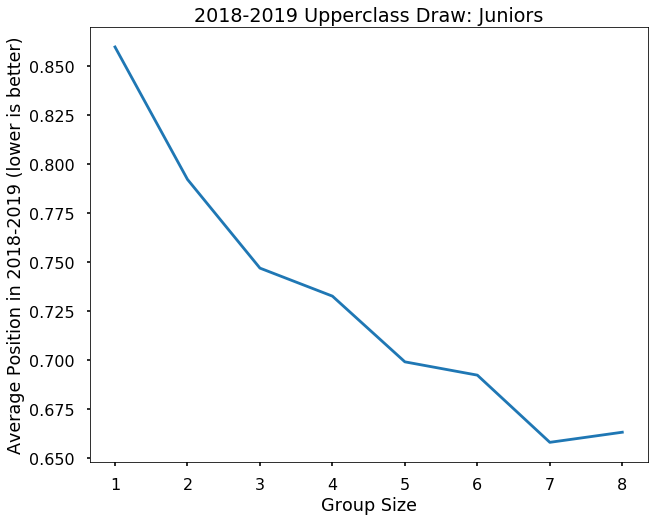

In [22]:
plt.figure(figsize = (10, 8))
plt.style.use('seaborn-poster')
plt.plot(range(1,9), u18_jun_group_avg)
plt.title("2018-2019 Upperclass Draw: Juniors")
plt.xlabel("Group Size")
plt.ylabel("Average Position in 2018-2019 (lower is better)")
plt.show()

## This is true across all draws in 2018-2019 and 2019-2020, including Underclass draws

In [23]:
butler19 = pd.read_csv("lists/ButlerDrawTimesTimeOrder19.csv")
forbes19 = pd.read_csv("lists/ForbesDrawTimesTimeOrder19.csv")
mathey19 = pd.read_csv("lists/MatheyDrawTimesTimeOrder19.csv")
rocky19 = pd.read_csv("lists/RockyDrawTimesTimeOrder19.csv")
whitman19 = pd.read_csv("lists/WhitmanDrawTimesTimeOrder19.csv")
wilson19 = pd.read_csv("lists/WilsonDrawTimesTimeOrder19.csv")

In [24]:
butler19_groups_ordered = butler19["Group"].unique()
butler19["Score"] = butler19["Group"].apply(lambda x: np.where(butler19_groups_ordered == x)[0][0]) + 1
butler19["Score"] = butler19["Score"] / len(butler19_groups_ordered)

forbes19_groups_ordered = forbes19["Group"].unique()
forbes19["Score"] = forbes19["Group"].apply(lambda x: np.where(forbes19_groups_ordered == x)[0][0]) + 1
forbes19["Score"] = forbes19["Score"] / len(forbes19_groups_ordered)

mathey19_groups_ordered = mathey19["Group"].unique()
mathey19["Score"] = mathey19["Group"].apply(lambda x: np.where(mathey19_groups_ordered == x)[0][0]) + 1
mathey19["Score"] = mathey19["Score"] / len(mathey19_groups_ordered)

rocky19_groups_ordered = rocky19["Group"].unique()
rocky19["Score"] = rocky19["Group"].apply(lambda x: np.where(rocky19_groups_ordered == x)[0][0]) + 1
rocky19["Score"] = rocky19["Score"] / len(rocky19_groups_ordered)

whitman19_groups_ordered = whitman19["Group"].unique()
whitman19["Score"] = whitman19["Group"].apply(lambda x: np.where(whitman19_groups_ordered == x)[0][0]) + 1
whitman19["Score"] = whitman19["Score"] / len(whitman19_groups_ordered)

wilson19_groups_ordered = wilson19["Group"].unique()
wilson19["Score"] = wilson19["Group"].apply(lambda x: np.where(wilson19_groups_ordered == x)[0][0]) + 1
wilson19["Score"] = wilson19["Score"] / len(wilson19_groups_ordered)

In [25]:
butler19_groups = pd.DataFrame(butler19_groups_ordered, columns = ["Group"])
butler19_groups["n_Students"] = butler19_groups["Group"].apply(lambda x: np.sum(butler19["Group"] == x))
butler19_groups["Score"] = butler19_groups.index / len(butler19_groups)
butler19_groups["n_Sophs"] = butler19_groups["Group"].apply(lambda x: np.sum(butler19[butler19["Class Yr"] == 2022]["Group"] == x))
butler19_groups_sophsonly = butler19_groups[butler19_groups["n_Students"] == butler19_groups["n_Sophs"]]

forbes19_groups = pd.DataFrame(forbes19_groups_ordered, columns = ["Group"])
forbes19_groups["n_Students"] = forbes19_groups["Group"].apply(lambda x: np.sum(forbes19["Group"] == x))
forbes19_groups["Score"] = forbes19_groups.index / len(forbes19_groups)
forbes19_groups["n_Sophs"] = forbes19_groups["Group"].apply(lambda x: np.sum(forbes19[forbes19["Class Yr"] == 2022]["Group"] == x))
forbes19_groups_sophsonly = forbes19_groups[forbes19_groups["n_Students"] == forbes19_groups["n_Sophs"]]

mathey19_groups = pd.DataFrame(mathey19_groups_ordered, columns = ["Group"])
mathey19_groups["n_Students"] = mathey19_groups["Group"].apply(lambda x: np.sum(mathey19["Group"] == x))
mathey19_groups["Score"] = mathey19_groups.index / len(mathey19_groups)
mathey19_groups["n_Sophs"] = mathey19_groups["Group"].apply(lambda x: np.sum(mathey19[mathey19["Class Yr"] == 2022]["Group"] == x))
mathey19_groups_sophsonly = mathey19_groups[mathey19_groups["n_Students"] == mathey19_groups["n_Sophs"]]

rocky19_groups = pd.DataFrame(rocky19_groups_ordered, columns = ["Group"])
rocky19_groups["n_Students"] = rocky19_groups["Group"].apply(lambda x: np.sum(rocky19["Group"] == x))
rocky19_groups["Score"] = rocky19_groups.index / len(rocky19_groups)
rocky19_groups["n_Sophs"] = rocky19_groups["Group"].apply(lambda x: np.sum(rocky19[rocky19["Class Yr"] == 2022]["Group"] == x))
rocky19_groups_sophsonly = rocky19_groups[rocky19_groups["n_Students"] == rocky19_groups["n_Sophs"]]

whitman19_groups = pd.DataFrame(whitman19_groups_ordered, columns = ["Group"])
whitman19_groups["n_Students"] = whitman19_groups["Group"].apply(lambda x: np.sum(whitman19["Group"] == x))
whitman19_groups["Score"] = whitman19_groups.index / len(whitman19_groups)
whitman19_groups["n_Sophs"] = whitman19_groups["Group"].apply(lambda x: np.sum(whitman19[whitman19["Class Yr"] == 2022]["Group"] == x))
whitman19_groups_sophsonly = whitman19_groups[whitman19_groups["n_Students"] == whitman19_groups["n_Sophs"]]

wilson19_groups = pd.DataFrame(wilson19_groups_ordered, columns = ["Group"])
wilson19_groups["n_Students"] = wilson19_groups["Group"].apply(lambda x: np.sum(wilson19["Group"] == x))
wilson19_groups["Score"] = wilson19_groups.index / len(wilson19_groups)
wilson19_groups["n_Sophs"] = wilson19_groups["Group"].apply(lambda x: np.sum(wilson19[wilson19["Class Yr"] == 2022]["Group"] == x))
wilson19_groups_sophsonly = wilson19_groups[wilson19_groups["n_Students"] == wilson19_groups["n_Sophs"]]

In [26]:
rescolleges = {"Butler": butler19_groups_sophsonly, "Forbes": forbes19_groups_sophsonly, "Mathey": mathey19_groups_sophsonly, "Rocky": rocky19_groups_sophsonly, "Whitman": whitman19_groups_sophsonly, "Wilson": wilson19_groups_sophsonly}

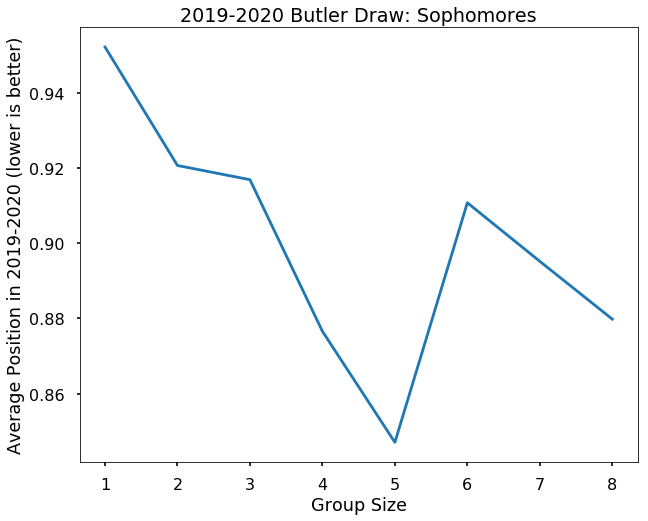

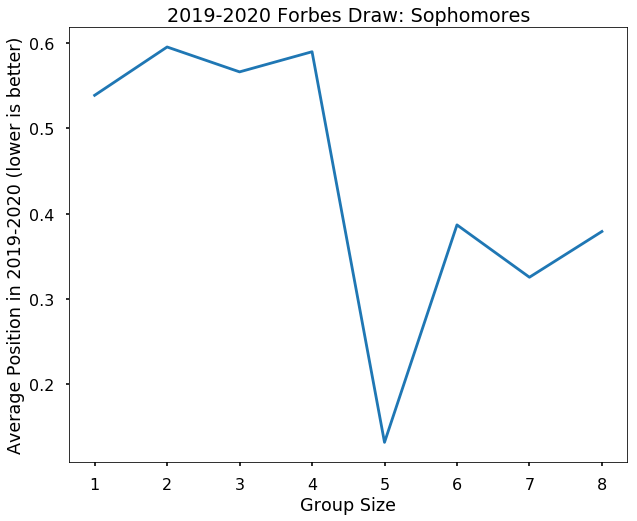

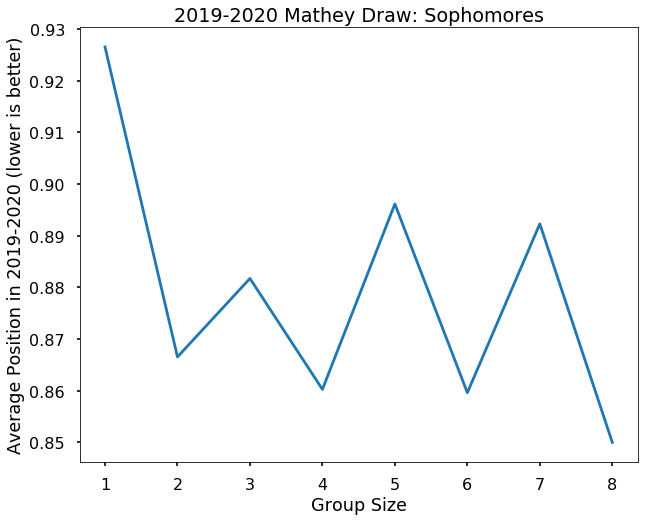

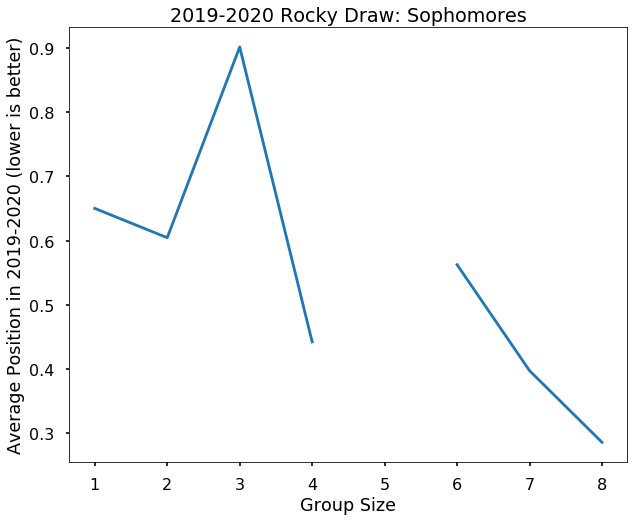

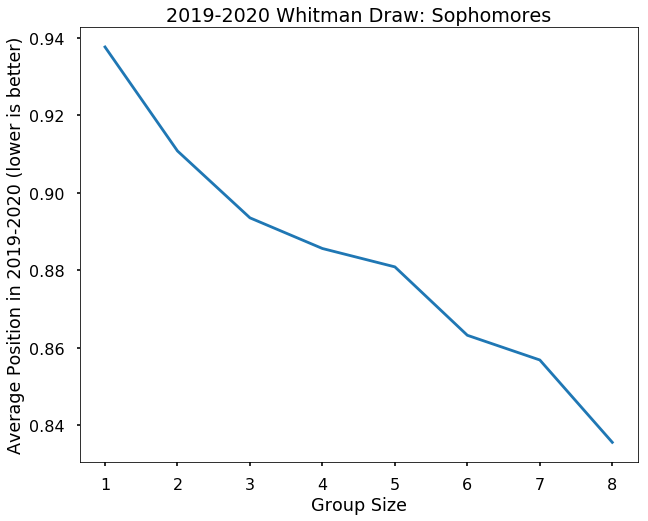

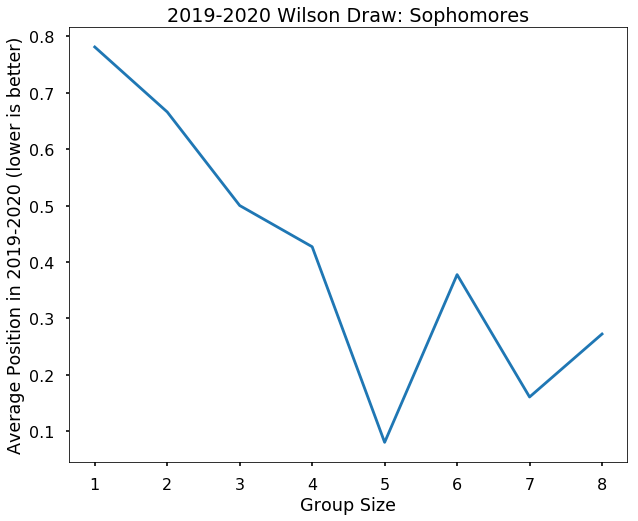

In [27]:
for rescol in rescolleges:
    soph_group_avg = []
    soph_group_std = []

    for i in range(1,9):
        soph_group_avg.append(np.mean(rescolleges.get(rescol)[rescolleges.get(rescol)["n_Students"] == i]["Score"]))
        soph_group_std.append(np.std(rescolleges.get(rescol)[rescolleges.get(rescol)["n_Students"] == i]["Score"]))

    plt.figure(figsize = (10, 8))
    plt.style.use('seaborn-poster')
    plt.plot(range(1,9), soph_group_avg)
    plt.title("2019-2020 %s Draw: Sophomores" % rescol)
    plt.xlabel("Group Size")
    plt.ylabel("Average Position in 2019-2020 (lower is better)")
    plt.show()

# Housing made a middle school mistake

The graphs above seemed rather linear (decreasing in group size), so we had a hunch that individual students were being drawn. By this we mean that if draw only has two groups, one with 8 people and one with 1 person, then you can draw in two ways:

1) If Housing drew by group, then each group would be chosen with equally likely probability (1/2). This is what Housing has repeatedly said in the past, that group sizes don't matter.

2) If Housing drew by person, then the 8 person group would be 8x as likely to be chosen first. If you took math in middle school, you know this is unfair.

It seems like Housing chose option 2.

### Let's simulate some shitty draws under option 2, where instead of randomly drawing by group, we'll randomly draw by student.

### So we'll draw a student (who's not yet on the draw list), add their entire group to the draw list, and repeat. This means that an eight-person group is 8x more likely to be drawn earlier than a one-person group.

### The graphs below should look oddly familiar.

In [28]:
# Copy upperclass draw list, but only seniors.
upperclass19_seniors = upperclass19[upperclass19["Group"].apply(lambda x: x in u19_groups_seniorsonly["Group"].unique())]

On all graphs, position is the position of a student's GROUP amongst all GROUPS in that draw. So, for example, most seniors should have a position in between 0-0.5 (since they come before all juniors).

C:\Users\Adam Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


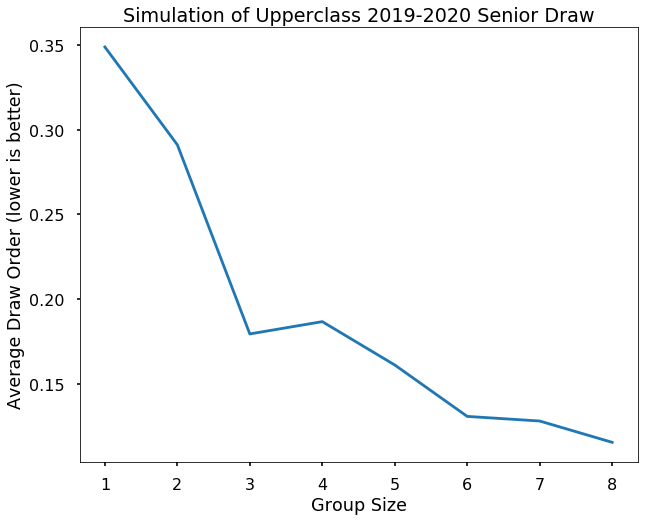

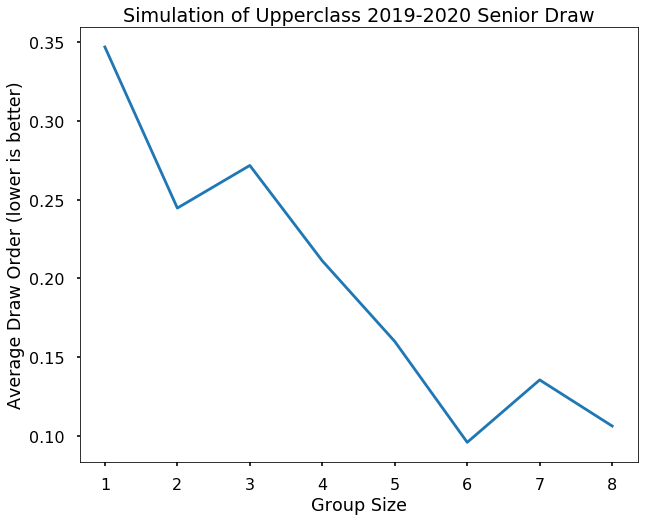

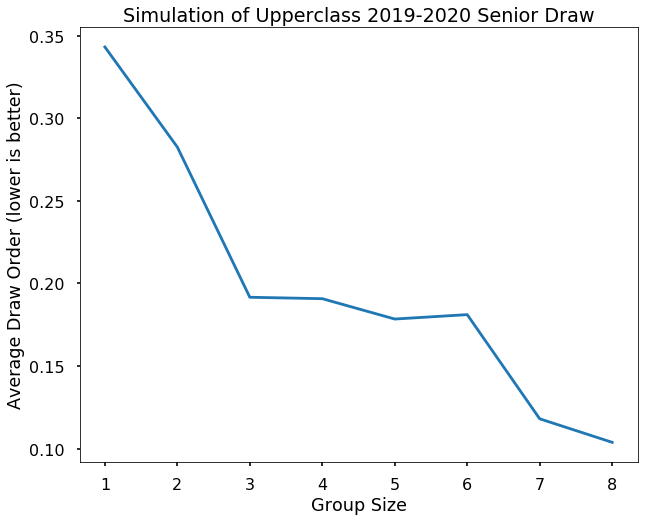

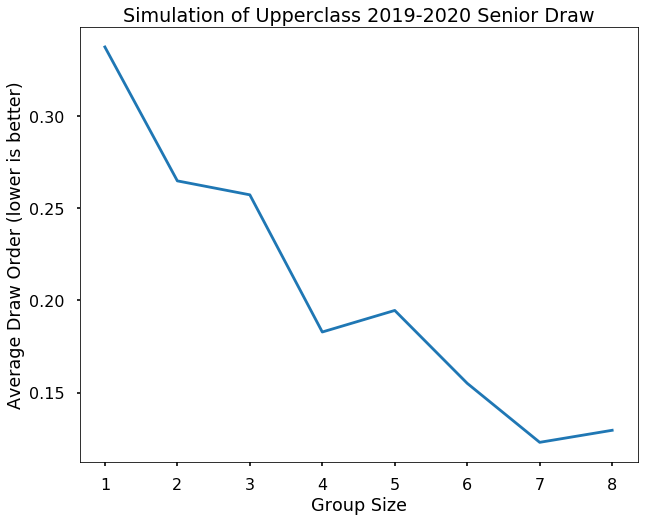

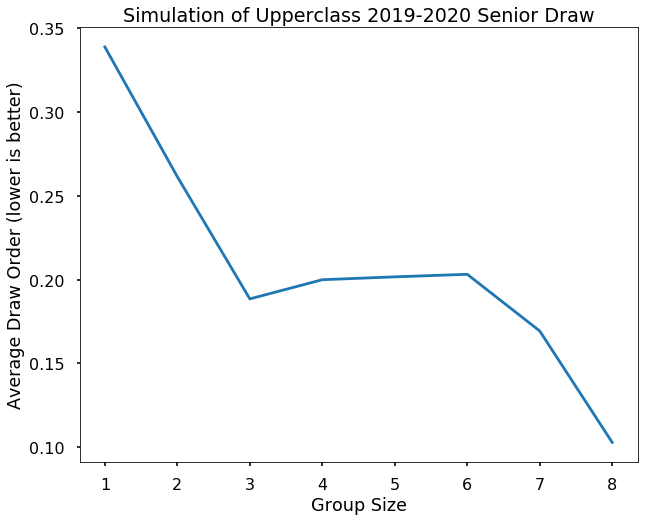

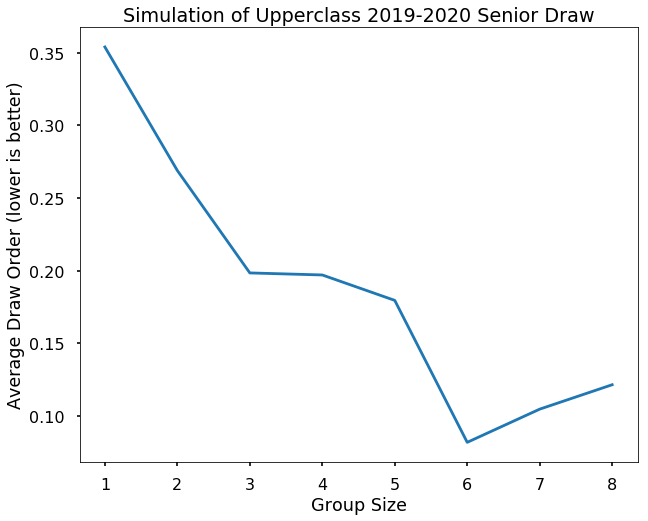

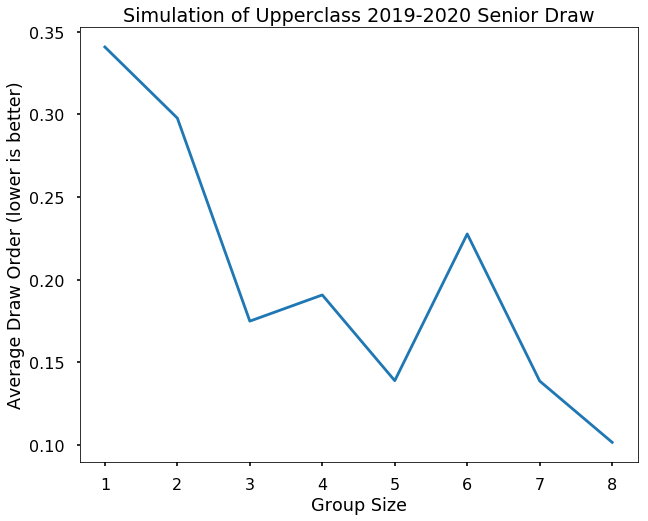

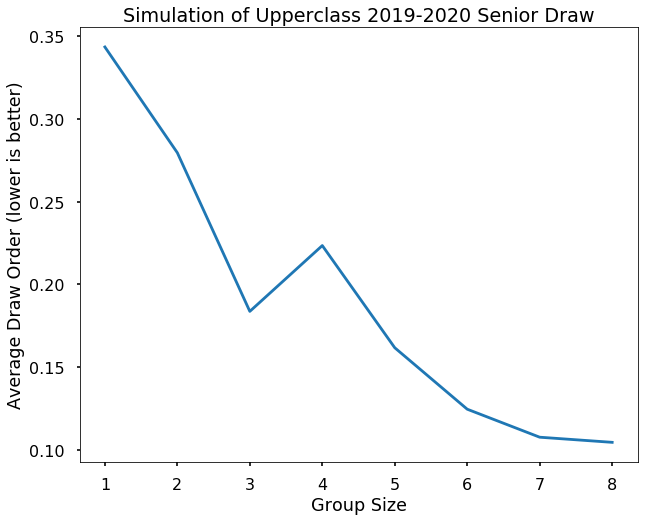

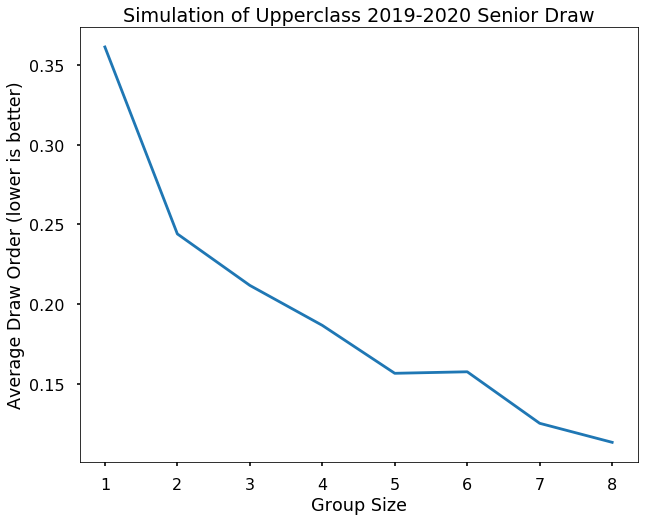

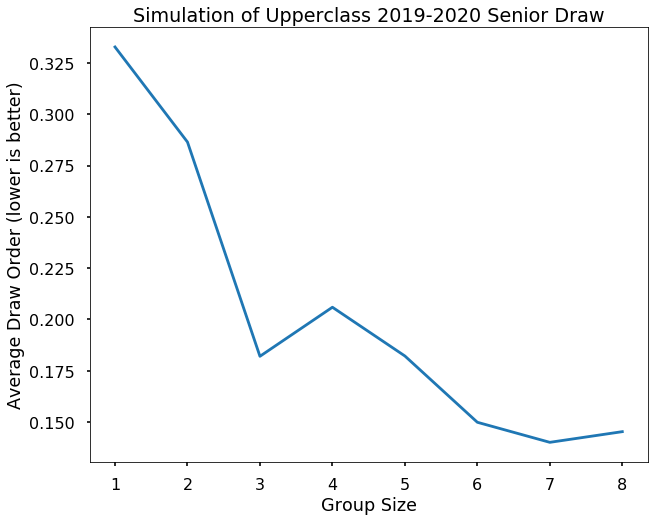

In [29]:
for j in range(10):
    order_drawn = np.zeros(9)
    n_drawn = np.zeros(9)

    groupsDrawn = []

    # Keep drawing until all groups are chosen.
    for i in range(315):

        # Randomly choose a person, and choose a different person if their group was already drawn.
        d_group = int(upperclass19_seniors.sample(n = 1)["Group"])

        while d_group in groupsDrawn:
            d_group = int(upperclass19_seniors.sample(n = 1)["Group"])

        groupsDrawn.append(d_group)

        # Save the order this group was drawn, in an array for all groups of that size.
        n_stud = np.sum(upperclass19_seniors["Group"] == d_group)

        order_drawn[n_stud] += (i / len(u19_groups))
        n_drawn[n_stud] += 1

    # Calculate the average draw order of groups, by size.

    avg_draw = order_drawn / n_drawn
    avg_draw = avg_draw[1:]

    plt.figure(figsize = (10, 8))
    plt.style.use('seaborn-poster')
    plt.plot(range(1,9), avg_draw)
    plt.title("Simulation of Upperclass 2019-2020 Senior Draw")
    plt.xlabel("Group Size")
    plt.ylabel("Average Draw Order (lower is better)")
    plt.show()

### Don't these graphs look oddly familiar?